## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
mouse_study_result = mouse_metadata.merge(study_results, on = "Mouse ID", how = "outer")
# Display the data table for preview
#mouse_study_result.isnull().values.any()
#study_results["Mouse ID"].isin(mouse_metadata["Mouse ID"])
#study_results.loc[~study_results["Mouse ID"].isin(mouse_metadata["Mouse ID"])]
## ask Ryan why 256 merge with 1890 without any nan
mouse_study_result

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
len(mouse_study_result)

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRow = mouse_study_result[mouse_study_result.duplicated()]
duplicateRow

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_result[(mouse_study_result["Drug Regimen"] == "Propriva") & (mouse_study_result["Timepoint"] == 0)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
541,a699,Propriva,Female,5,28,0,45.0,0
743,c927,Propriva,Female,4,26,0,45.0,0
885,g558,Propriva,Male,8,29,0,45.0,0
894,g570,Propriva,Male,16,29,0,45.0,0
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0
953,i635,Propriva,Male,21,26,0,45.0,0
1059,k603,Propriva,Male,2,27,0,45.0,0
1097,l215,Propriva,Male,10,29,0,45.0,0
1216,n482,Propriva,Female,4,29,0,45.0,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_result = mouse_study_result.drop(mouse_study_result.index[mouse_study_result["Mouse ID"] == "g989"])

In [6]:
# Checking the number of mice in the clean DataFrame.
len(mouse_study_result)

1880

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_study_result = mouse_study_result.drop(mouse_study_result.index[mouse_study_result["Mouse ID"] == "g989"])
a = mouse_study_result.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
b = mouse_study_result.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
c = mouse_study_result.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
d = mouse_study_result.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
e = mouse_study_result.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
tumor_stats = pd.DataFrame({
    "mean":a,
    "medain":b,
    "var":c,
    "std":d,
    "SEM":e
})
tumor_stats
# This method is the most straighforward, creating multiple series and putting them all together at the end.



,mean,medain,var,std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
###???

## Bar and Pie Charts

In [9]:
mice_number_list = mouse_study_result.drop_duplicates("Mouse ID").groupby("Drug Regimen")[["Mouse ID"]].count()
mice_number_list

,Mouse ID
Drug Regimen,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25
Placebo,25
Propriva,24
Ramicane,25
Stelasyn,24


Text(0, 0.5, 'Mice number')

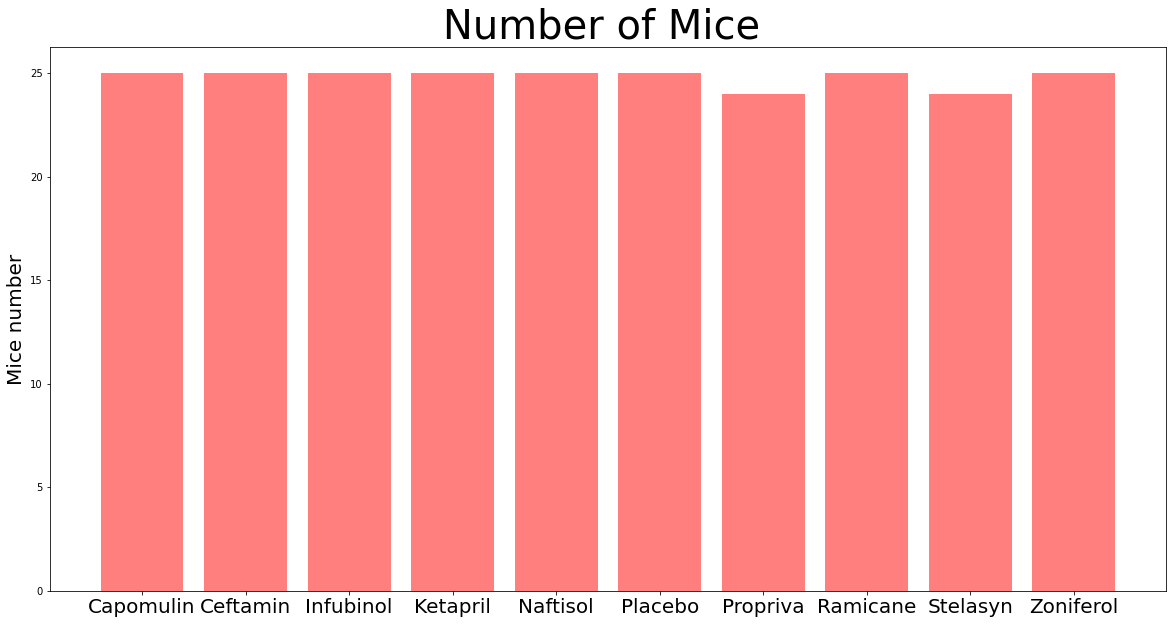

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_number_list = mouse_study_result.groupby("Drug Regimen")["Mouse ID"].unique()

mice_number = [len(num) for num in mice_number_list ]
mice_number_list.index

plt.figure(figsize=(20,10))
x_axis = np.arange(len(mice_number))
plt.bar(x_axis, mice_number, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, mice_number_list.index, fontsize = 20)
plt.title ("Number of Mice ", fontsize=40)
plt.ylabel("Mice number", fontsize = 20)

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#???


(-1.1879383453817902,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

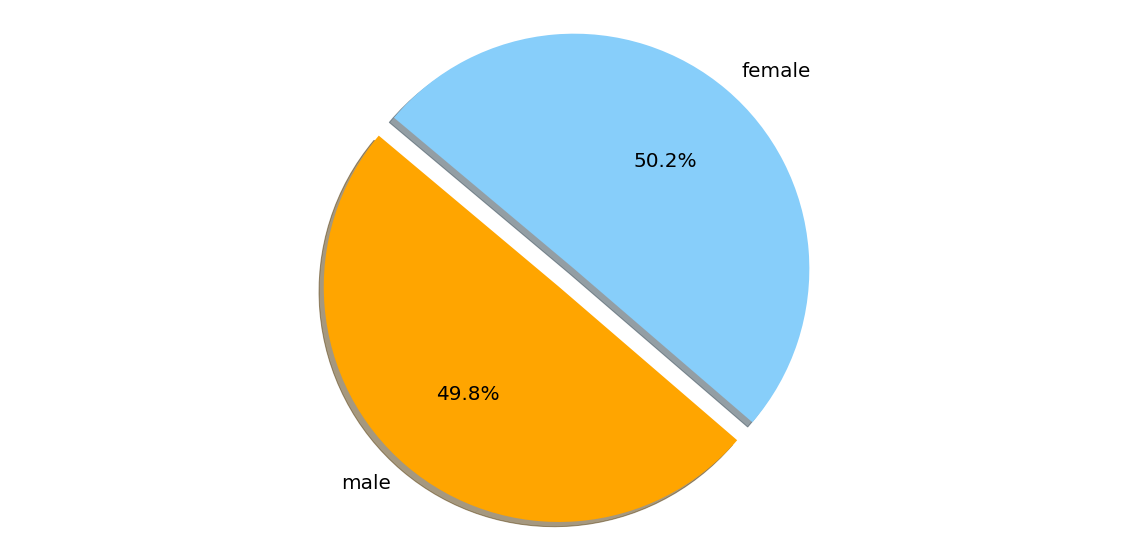

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
###Ask Ryan if the distrubition means number of female and male mices
mice_number_list = mouse_study_result.groupby("Sex")["Mouse ID"].unique()
mice_number = [len(num) for num in mice_number_list ]
mice_number

plt.figure(figsize=(20,10))
labels = ["male", "female"]
sizes = [124, 125]
colors = ["orange", "lightskyblue"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, textprops={'fontsize': 20})
plt.axis("equal")

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
def data_prepare(data, Drug_Regimen):
    data_ori = data[data["Drug Regimen"] == Drug_Regimen]
    data_last_timepoint = data_ori[["Mouse ID", "Timepoint"]].groupby("Mouse ID").max().reset_index()
    
    # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
    data_merge = data_last_timepoint.merge(data_ori, on = "Mouse ID", how = "inner").groupby("Mouse ID").tail(1)
    return data_merge
    

Capomulin = data_prepare(mouse_study_result, "Capomulin")
Ramicane = data_prepare(mouse_study_result, "Ramicane")
Infubinol = data_prepare(mouse_study_result, "Infubinol")
Ceftamin = data_prepare(mouse_study_result, "Ceftamin")

Ramicane

,Mouse ID,Timepoint_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
9,a411,45,Ramicane,Male,3,22,45,38.407618,1
19,a444,45,Ramicane,Female,10,25,45,43.047543,0
29,a520,45,Ramicane,Male,13,21,45,38.810366,1
39,a644,45,Ramicane,Female,7,17,45,32.978522,1
46,c458,30,Ramicane,Female,23,20,30,38.342008,2
56,c758,45,Ramicane,Male,9,17,45,33.397653,1
66,d251,45,Ramicane,Female,8,19,45,37.311236,2
76,e662,45,Ramicane,Male,8,24,45,40.659006,2
86,g791,45,Ramicane,Male,11,16,45,29.128472,1
96,i177,45,Ramicane,Male,10,18,45,33.562402,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)

#treatments = mouse_study_result["Drug Regimen"].unique().tolist()[0:4]
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

def IQR_cal(data,column):
    data_sort = data[column].sort_values().reset_index()
    i, d = divmod((len(data_sort) + 1 )/4, 1)
    if d == 0:
        f_position = i
        FIQ = data_sort[column][f_position]
        TIQ = data_sort[column][3*f_position]
        IQR = TIQ - FIQ
    else:
        f_position1 = i
        f_position2 = i+1
        FIQ = (data_sort[column][f_position1] + data_sort[column][f_position2])/2
        TIQ = (data_sort[column][3*f_position1] + data_sort[column][3*f_position2])/2
        IQR = TIQ - FIQ 
    return IQR, FIQ, TIQ



    # Locate the rows which contain mice on each drug and get the tumor volumes
    
Capomulin_IQR = IQR_cal(Capomulin,"Tumor Volume (mm3)")
Ramicane_IQR = IQR_cal(Ramicane,"Tumor Volume (mm3)")
Infubinol_IQR = IQR_cal(Infubinol,"Tumor Volume (mm3)")
Ceftamin_IQR = IQR_cal(Ceftamin,"Tumor Volume (mm3)")

    # add subset 
    
Capomulin_vol = Capomulin["Tumor Volume (mm3)"]
Ramicane_vol = Ramicane["Tumor Volume (mm3)"]
Infubinol_vol = Infubinol["Tumor Volume (mm3)"]
Ceftamin_vol = Ceftamin["Tumor Volume (mm3)"]
    
    
    # Determine outliers using upper and lower bounds
    
lower_Capomulin = IQR_cal(Capomulin,"Tumor Volume (mm3)")[1] - 1.5 * IQR_cal(Capomulin,"Tumor Volume (mm3)")[0]
upper_Capomulin = IQR_cal(Capomulin,"Tumor Volume (mm3)")[2] + 1.5 * IQR_cal(Capomulin,"Tumor Volume (mm3)")[0]

lower_Ramicane = IQR_cal(Ramicane,"Tumor Volume (mm3)")[1] - 1.5 * IQR_cal(Ramicane,"Tumor Volume (mm3)")[0]
upper_Ramicane = IQR_cal(Ramicane,"Tumor Volume (mm3)")[2] + 1.5 * IQR_cal(Ramicane,"Tumor Volume (mm3)")[0]

lower_Infubinol = IQR_cal(Infubinol,"Tumor Volume (mm3)")[1] - 1.5 * IQR_cal(Infubinol,"Tumor Volume (mm3)")[0]
upper_Infubinol = IQR_cal(Infubinol,"Tumor Volume (mm3)")[2] + 1.5 * IQR_cal(Infubinol,"Tumor Volume (mm3)")[0]

lower_Ceftamin = IQR_cal(Ceftamin,"Tumor Volume (mm3)")[1] - 1.5 * IQR_cal(Ceftamin,"Tumor Volume (mm3)")[0]
upper_Ceftamin = IQR_cal(Ceftamin,"Tumor Volume (mm3)")[2] + 1.5 * IQR_cal(Ceftamin,"Tumor Volume (mm3)")[0]

{'whiskers': [<matplotlib.lines.Line2D at 0x1d752fed8c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1d75302eb08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d75302b3c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1d753033b08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d753033c88>],
 'means': []}

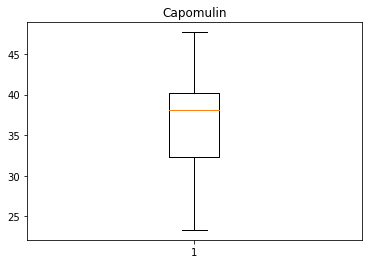

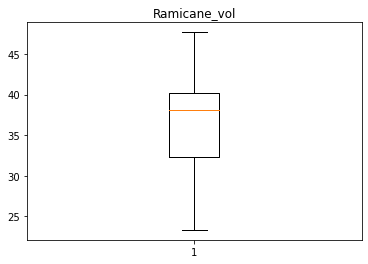

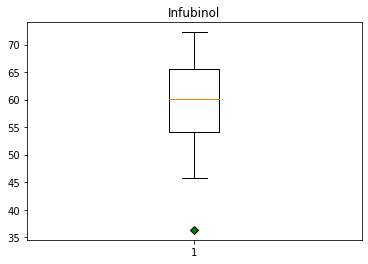

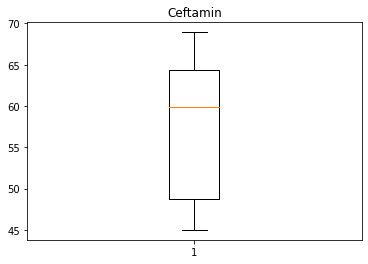

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin')
ax1.boxplot(Capomulin_vol, showfliers =True)

fig2, ax2 = plt.subplots()
ax2.set_title('Ramicane_vol')
ax2.boxplot(Capomulin_vol, showfliers =True)

green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Infubinol')
ax3.boxplot(Infubinol_vol, showfliers =True, flierprops=green_diamond)

fig4, ax4 = plt.subplots()
ax4.set_title('Ceftamin')
ax4.boxplot(Ceftamin_vol, showfliers =True)

## Line and Scatter Plots

(array([20., 25., 30., 35., 40., 45., 50.]),
 <a list of 7 Text major ticklabel objects>)

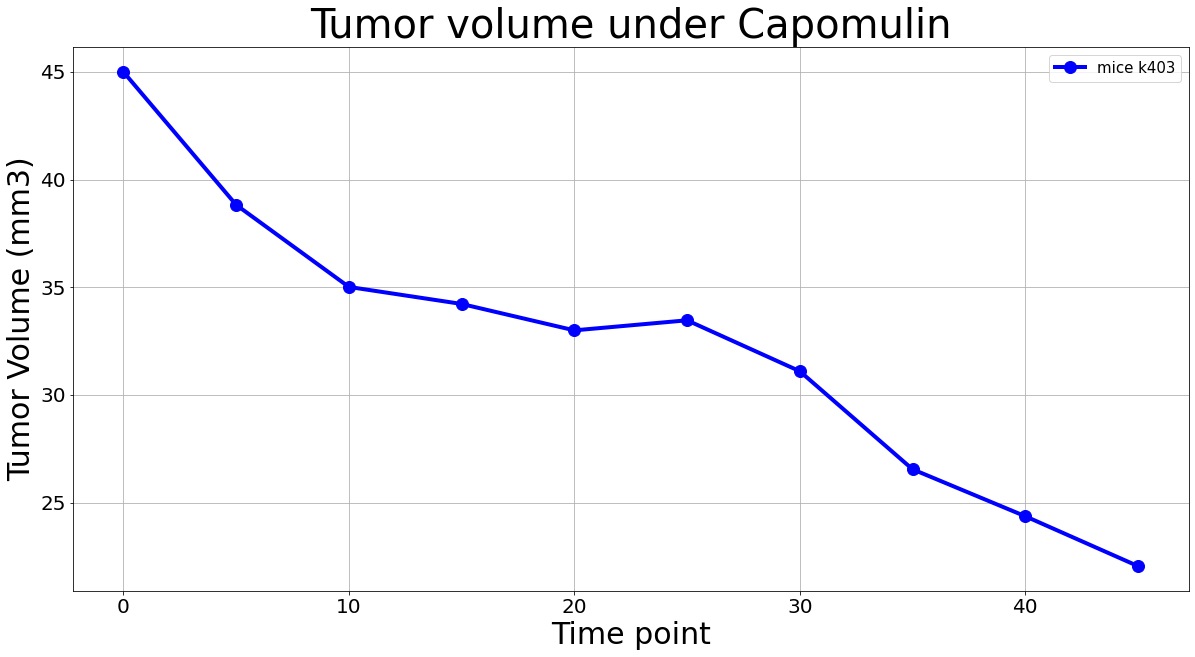

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

k403 = mouse_study_result[mouse_study_result["Mouse ID"] == "k403"]
k403
plt.figure(figsize=(20,10))
plt.plot(k403["Timepoint"], k403["Tumor Volume (mm3)"], marker ='o', color='blue', label="mice k403", lw = 4, markersize=12)
plt.title("Tumor volume under Capomulin", fontsize = 40)
plt.xlabel("Time point", fontsize = 30)
plt.ylabel("Tumor Volume (mm3)", fontsize = 30)
plt.legend(loc="upper right", prop={'size': 15}) 
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

C:\Users\li116\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper lfet'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


(array([20., 25., 30., 35., 40., 45., 50.]),
 <a list of 7 Text major ticklabel objects>)

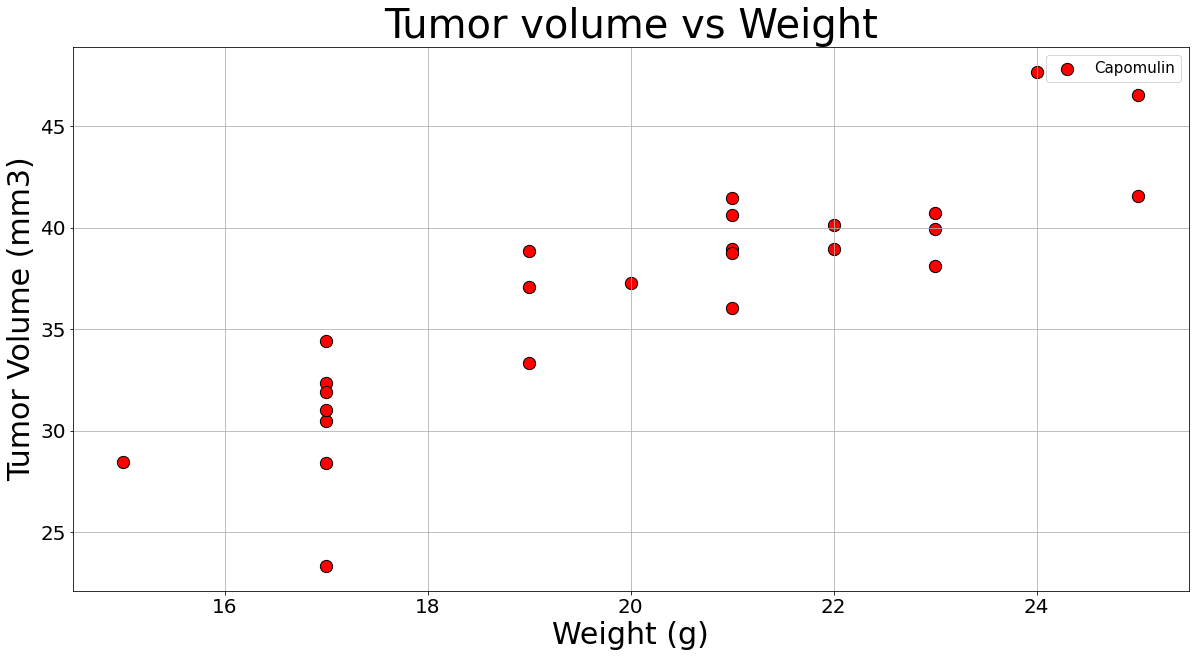

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.figure(figsize=(20,10))
plt.scatter(Capomulin["Weight (g)"], Capomulin["Tumor Volume (mm3)"], marker="o", facecolors="red", edgecolors="black", label = "Capomulin", s =150)
plt.title("Tumor volume vs Weight", fontsize = 40)
plt.xlabel("Weight (g)", fontsize = 30)
plt.ylabel("Tumor Volume (mm3)", fontsize = 30)
plt.legend(loc="upper lfet", prop={'size': 15}) 
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
data = mouse_study_result[mouse_study_result["Drug Regimen"] == "Capomulin"]
weight = data.groupby("Mouse ID").mean()["Weight (g)"]
tumor_vol = data.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]
correlation = st.pearsonr(weight,tumor_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumor_vol)
print("slope", slope)
print("intercept", intercept)
print(weight * slope + intercept)

slope 0.9544396890241045
intercept 21.552160532685015
Mouse ID
b128    42.549834
b742    41.595394
f966    37.777635
g288    39.686515
g316    42.549834
i557    44.458713
i738    40.640954
j119    43.504273
j246    41.595394
l509    41.595394
l897    39.686515
m601    37.777635
m957    39.686515
r157    45.413153
r554    37.777635
r944    45.413153
s185    37.777635
s710    43.504273
t565    37.777635
u364    37.777635
v923    41.595394
w150    43.504273
w914    41.595394
x401    35.868756
y793    37.777635
Name: Weight (g), dtype: float64


In [21]:
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = 0.95x + 21.55


The r-squared is: 0.7088568047708717


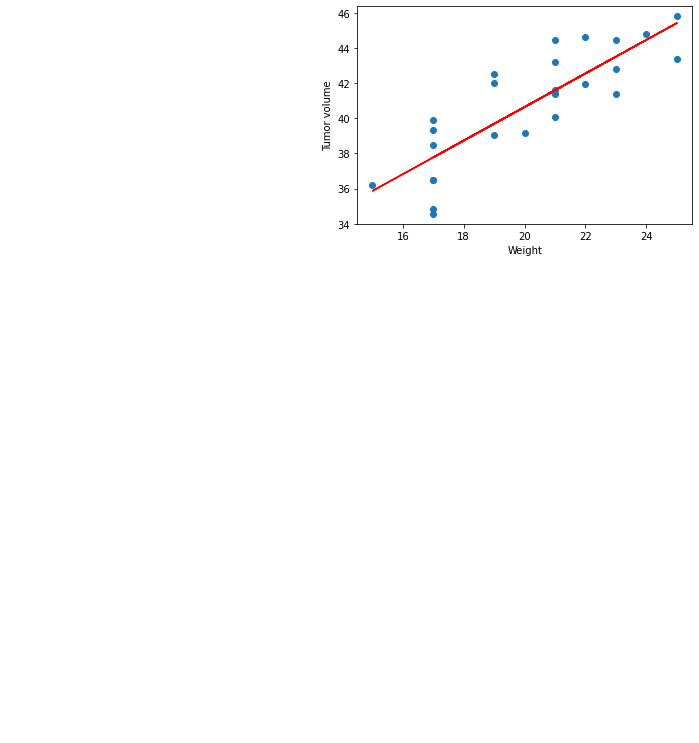

In [28]:
weight = data.groupby("Mouse ID").mean()["Weight (g)"]
tumor_vol = data.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]

plt.scatter(weight,tumor_vol)
plt.plot(weight,regress_values,"r-")


plt.annotate(line_eq,(3,5), fontsize=10, color = "red")
plt.xlabel('Weight')
plt.ylabel('Tumor volume')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [23]:
line_eq

'y = 0.95x + 21.55'